In [8]:
import numpy as np
import torch
from utils.plot_picking import plot_events
from training.test import inference
from models.tunet import load_model
import torch
from datetime import datetime
from dataset.dataset import get_events

In [9]:
def run_inference(model, image):
    start_time = datetime.now()
    picking_array = inference(model, image)
    tot_time = (datetime.now() - start_time).total_seconds()
    print(f"Inference time: {tot_time} s")
    return picking_array

In [10]:
# Load Model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = load_model(device=device)
model

TUNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


In [11]:
def test_single_event(model, image, device):  
    '''  
    Example usage of the script:  
    - `image` has a dtype of `torch.float32` and shape `(1, 400, 1200)`  
    '''   
    image = image.to(device)
    picking_array = run_inference(model, image)
    plot_events(picking_array, image)

In [12]:
t_image, image = get_events('data/campi_flegrei/labeled-data/data/test/031670_1.3_2023-11-06_02-14-55.000000.npy')

In [13]:
print(t_image.shape, image.shape)

torch.Size([1, 1, 400, 1200]) (4324, 12000)


Inference time: 0.034533 s


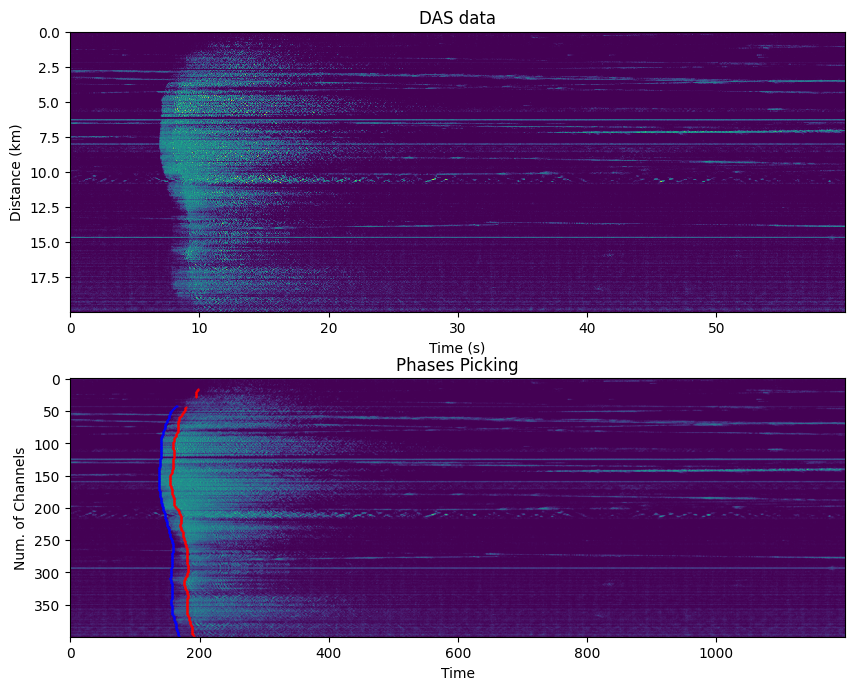

In [14]:
test_single_event(model, t_image, device)